# String processing

**Benchmarking tests for comparison.**

## Requirements

In [1]:
from os import getcwd
from sys import path as sys_path
sys_path.append(getcwd())

In [2]:
import patternMatching

In [3]:
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import timeit as t
import itertools as it

## Loading the texts

In [103]:
texts = {i: [patternMatching.ExactMatching(f"text{i}.txt", "sentido"),
             patternMatching.FuzzyMatching(f"text{i}.txt", "sentido")] for i in range(5)}
lengths = [len(texts[text][0].text) for text in texts.keys()]
texts = {lengths[i]: texts[i] for i in range(5)}

In [106]:
lengths

[566, 931, 1405, 2022, 4879]

## Creating the `pd.DataFrame` object

In [133]:
algorithms = ["Brute-force", "BMH", "BMHS", "Exact shift-and",
              "Approximate shift-and (k = 1)", "Approximate shift-and (k = 2)"]
executions = 10

In [134]:
index = pd.MultiIndex.from_product([algorithms, texts.keys(), list(range(executions))],
                                   names=["Algorithm", "Number of characters", "Execution"])
columns = ["Time elapsed (in seconds)"]
results = pd.DataFrame(index=index, columns=columns)

In [135]:
results

Time elapsed (in seconds)
Algorithm                     Number of characters Execution                          
Brute-force                   566                  0                               NaN
                                                   1                               NaN
                                                   2                               NaN
                                                   3                               NaN
                                                   4                               NaN
...                                                                                ...
Approximate shift-and (k = 2) 4879                 5                               NaN
                                                   6                               NaN
                                                   7                               NaN
                                                   8                               NaN
                                                   9                               NaN

[300 rows x 1 columns]

## Testing

In [136]:
def testing():
    for technique in algorithms:
        for text in lengths:
            if technique == "Brute-force":
                results.loc[(technique, text),
                            "Time elapsed (in seconds)"] = t.repeat(stmt=f"texts[{text}][0].new_brute_force()",
                                                       globals=globals(), repeat=executions, number=1)
            elif technique == "BMH":
                results.loc[(technique, text),
                            "Time elapsed (in seconds)"] = t.repeat(stmt=f"texts[{text}][0].new_BMH()",
                                                       globals=globals(), repeat=executions, number=1)
            elif technique == "BMHS":
                results.loc[(technique, text),
                            "Time elapsed (in seconds)"] = t.repeat(stmt=f"texts[{text}][0].new_BMHS()",
                                                       globals=globals(), repeat=executions, number=1)
            elif technique == "Exact shift-and":
                results.loc[(technique, text),
                            "Time elapsed (in seconds)"] = t.repeat(stmt=f"texts[{text}][0].ShiftAnd()",
                                                       globals=globals(), repeat=executions, number=1)
            elif technique == "Approximate shift-and (k = 1)":
                results.loc[(technique, text),
                            "Time elapsed (in seconds)"] = t.repeat(stmt=f"texts[{text}][1].ShiftAnd(1)",
                                                       globals=globals(), repeat=executions, number=1)
            elif technique == "Approximate shift-and (k = 2)":
                results.loc[(technique, text),
                            "Time elapsed (in seconds)"] = t.repeat(stmt=f"texts[{text}][1].ShiftAnd(2)",
                                                       globals=globals(), repeat=executions, number=1)
            else:
                raise ValueError("What did just happen now?")
                
    results.loc[:, "Time elapsed (in seconds)"] = results.loc[:, "Time elapsed (in seconds)"].astype(float)

c:\users\igor moreira\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
c:\users\igor moreira\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3058: PerformanceWarning: indexing past lexsort depth may impact performance.
  interactivity=interactivity, compiler=compiler, result=result)


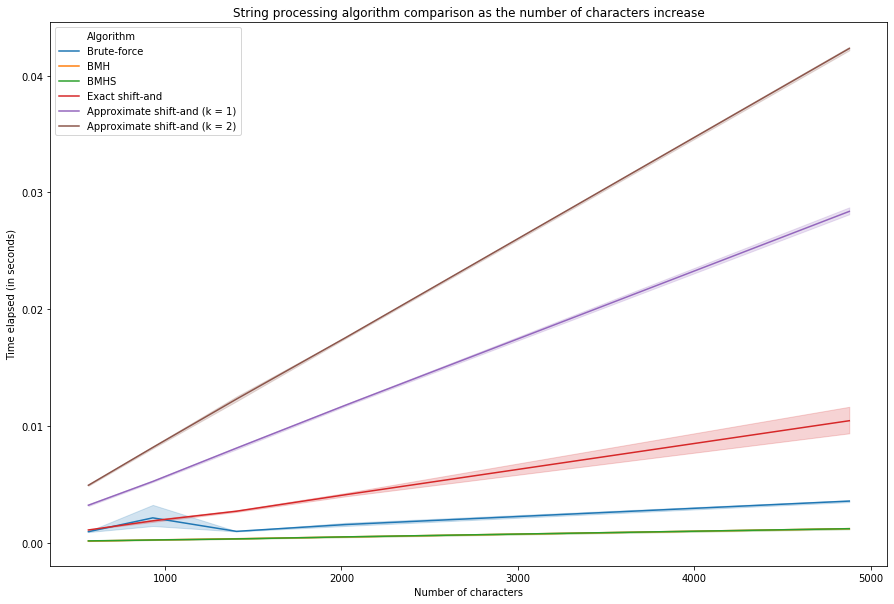

In [137]:
testing()

fig, axes = plt.subplots(1, 1, figsize=(15, 10))

axes.set_title("String processing algorithm comparison as the number of characters increase")

sns.lineplot(x="Number of characters", y="Time elapsed (in seconds)",
             hue="Algorithm", data=results.reset_index(), ax=axes)